In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load_datasets
path = str(os.getcwd()) + "\\" + "Datasets"
Trees = np.load(os.path.join(path ,"Minecraft_Trees.npy"))

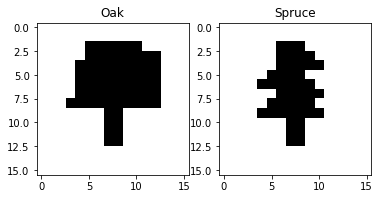

In [3]:
#img_plot
fig, ax = plt.subplots(1,2)

ax[0].set_title("Oak")
ax[0].imshow(Trees[4], cmap = "gray", interpolation = "nearest")
ax[1].set_title("Spruce")
ax[1].imshow(Trees[104], cmap = "gray", interpolation = "nearest")

plt.show()

In [4]:
#set_label
label = []

for index, data in enumerate(Trees):
    if (index <= 100):
        label.append([1, 0])
    else:
        label.append([0, 1])
        
label = np.array(label)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#define_features & targets
X = Trees.copy().reshape(200,16,16,1)
y = label.copy()

In [7]:
#split_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [9]:
class MyModel:
    
    def __init__(self, X_train, X_test, y_train, y_test):
        
        self.X_train = X_train
        self.X_test = X_test 
        self.y_train = y_train
        self.y_test = y_test
        
        self.CNN_model = Sequential()
        
        #Layer_1
        self.CNN_model.add(Conv2D(16, (3,3), input_shape=(16,16,1)))
        self.CNN_model.add(Activation("relu"))
        self.CNN_model.add(MaxPooling2D(pool_size=(2,2)))
        
        #Layer_2
        self.CNN_model.add(Conv2D(16, (3,3)))
        self.CNN_model.add(Activation("relu"))
        self.CNN_model.add(MaxPooling2D(pool_size=(2,2)))
        
        #Layer_3
        self.CNN_model.add(Flatten())
        self.CNN_model.add(Dense(16))
        
        #Layer_4_output
        self.CNN_model.add(Dense(2))
        self.CNN_model.add(Activation("softmax"))
        
        self.CNN_model.compile(loss=categorical_crossentropy, optimizer=Adam(),
        metrics=["accuracy"])
        
    def getFit(self):
        self.CNN_model.fit(X_train, y_train, batch_size=20, epochs=5)
        return self.CNN_model.summary()
    
    def getEvaluate(self):
        return self.CNN_model.evaluate(self.X_test, self.y_test)
    
    def getPredict(self, X_test):
        return self.CNN_model.predict(X_test)

In [10]:
CNN_model = MyModel(X_train, X_test, y_train, y_test)

In [11]:
CNN_model.getFit()

Epoch 1/5
8/8 [==============================] - 1s 3ms/step - loss: 10.3983 - accuracy: 0.5471
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.9925
Epoch 3/5
8/8 [==============================] - 0s 3ms/step - loss: 0.7897 - accuracy: 0.9349
Epoch 4/5
8/8 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.9944
Epoch 5/5
8/8 [==============================] - 0s 3ms/step - loss: 0.2751 - accuracy: 0.9944
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
__________________________________________

In [12]:
CNN_model.getEvaluate()

2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [13]:
X_unseen = np.load(os.path.join(path ,"Unseen_Trees.npy"))
X_unseen_input = np.load(os.path.join(path ,"Unseen_Trees.npy")).reshape(10,16,16,1)

In [14]:
predict = CNN_model.getPredict(X_unseen_input)

In [15]:
label_name = []
for data in predict:
    if data[0] == 1 and data[1] == 0:
        label_name.append("Oak")
    else:
        label_name.append("Spruce")

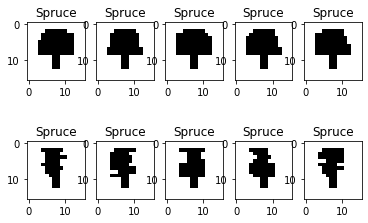

In [16]:
fig, ax = plt.subplots(2,5)

k = 0
for i in range(2):
    for j in range(5):
        ax[i][j].set_title(f"{label_name[k]}")
        ax[i][j].imshow(X_unseen[k], cmap = "gray", interpolation = "nearest")
        k += 1
    
plt.show()